In [269]:
!pip install squarify

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [225]:
df=pd.read_csv('COVID-19 Survey Student Responses.csv')
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


<h2 style='color:mediumseagreen'>3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp?</h2>

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

<h3>Ta thấy một số vấn đề cần giải quyết:</h3>

- Cột `Time spent on TV` là cột đúng ra có dạng dữ liệu numerical. Nên ta sẽ tiến hành xử lý các cột này để đưa chúng về đúng kiểu dữ liệu.

In [227]:
df['Time spent on TV'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

In [228]:
def conditions(x):
    if x=='No tv' or x=='n' or x=='N' or x==' ':
        return '0'
    else: 
        return x
df['Time spent on TV']=df['Time spent on TV'].apply(conditions)

In [229]:
df['Time spent on TV']=df['Time spent on TV'].apply(float)

In [230]:
df['Time spent on TV'].unique()


array([ 1.  ,  0.  ,  3.  ,  0.5 ,  2.  ,  4.5 ,  1.5 ,  4.  ,  0.3 ,
        5.  ,  0.1 ,  0.25,  6.  ,  0.6 ,  7.  ,  8.  , 15.  ,  0.75,
        2.5 ,  3.5 ,  0.4 ])

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

Time spent on self study, Time spent on Online Class , Medium for online class----------------->Rating of Online Class experience


In [232]:
df

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1.0,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0.0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0.0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0.0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1.0,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2.0,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1.0,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2.0,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1.0,4,Remain Constant,NO,Reading books,YES,YES,School/college


## Tương quan giữa Time spent on Online Class và Medium for online class đối với Rating of Online Class experience

### Bước 1: Kiểm tra dữ liệu thiếu.

In [233]:
df[df['Rating of Online Class experience'].isna()]

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
34,R35,Delhi-NCR,20,0.0,NaN,NaN,6.0,1.0,6.0,5.0,Instagram,0.0,4,Increased,NO,Talking to your relatives,YES,NO,Eating outside
39,R40,Delhi-NCR,20,0.0,NaN,NaN,8.0,0.0,8.0,0.0,Youtube,0.0,3,Increased,NO,Reading books,NO,YES,Travelling
66,R67,Outside Delhi-NCR,19,0.0,NaN,NaN,0.0,2.0,6.0,4.0,Instagram,0.5,3,Remain Constant,NO,Listening to music,NO,YES,Eating outside
129,R130,Delhi-NCR,19,0.0,NaN,NaN,1.0,3.0,8.0,5.0,Instagram,1.0,1,Decreased,NO,Listening to music,NO,YES,Eating outside
230,R232,Delhi-NCR,21,0.0,NaN,NaN,10.0,1.0,5.0,0.5,Linkedin,0.0,4,Remain Constant,NO,Cooking,NO,NO,Internet
240,R242,Outside Delhi-NCR,19,0.0,NaN,NaN,2.0,1.0,8.0,4.0,Instagram,0.0,3,Remain Constant,NO,Online gaming,YES,YES,"Friends , relatives"
250,R253,Delhi-NCR,18,0.0,NaN,NaN,8.0,0.5,5.0,3.0,Linkedin,1.0,3,Remain Constant,NO,Dancing,YES,YES,Travelling
303,R309,Outside Delhi-NCR,18,0.0,NaN,NaN,1.0,1.0,12.0,4.0,Instagram,0.0,3,Remain Constant,NO,Online gaming,YES,YES,"Friends , relatives"
339,R346,Outside Delhi-NCR,22,0.0,NaN,NaN,5.0,1.0,7.0,2.0,Youtube,1.0,4,Increased,NO,Watching web series,NO,YES,School/college
376,R383,Delhi-NCR,28,0.0,NaN,NaN,4.0,2.0,7.0,2.0,Twitter,2.0,2,Decreased,NO,Meditation,YES,YES,Travelling


In [234]:
df[df['Medium for online class'].isna()]

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
32,R33,Delhi-NCR,21,0.0,Very poor,NaN,5.0,2.0,4.0,2.0,Omegle,0.0,3,Remain Constant,NO,Watching orgasm releasing videos,YES,NO,Nothing this is my usual life
34,R35,Delhi-NCR,20,0.0,NaN,NaN,6.0,1.0,6.0,5.0,Instagram,0.0,4,Increased,NO,Talking to your relatives,YES,NO,Eating outside
39,R40,Delhi-NCR,20,0.0,NaN,NaN,8.0,0.0,8.0,0.0,Youtube,0.0,3,Increased,NO,Reading books,NO,YES,Travelling
66,R67,Outside Delhi-NCR,19,0.0,NaN,NaN,0.0,2.0,6.0,4.0,Instagram,0.5,3,Remain Constant,NO,Listening to music,NO,YES,Eating outside
129,R130,Delhi-NCR,19,0.0,NaN,NaN,1.0,3.0,8.0,5.0,Instagram,1.0,1,Decreased,NO,Listening to music,NO,YES,Eating outside
230,R232,Delhi-NCR,21,0.0,NaN,NaN,10.0,1.0,5.0,0.5,Linkedin,0.0,4,Remain Constant,NO,Cooking,NO,NO,Internet
240,R242,Outside Delhi-NCR,19,0.0,NaN,NaN,2.0,1.0,8.0,4.0,Instagram,0.0,3,Remain Constant,NO,Online gaming,YES,YES,"Friends , relatives"
250,R253,Delhi-NCR,18,0.0,NaN,NaN,8.0,0.5,5.0,3.0,Linkedin,1.0,3,Remain Constant,NO,Dancing,YES,YES,Travelling
298,R304,Outside Delhi-NCR,21,0.0,Very poor,NaN,1.0,0.0,10.0,3.0,Instagram,2.0,3,Remain Constant,NO,Watching web series,NO,NO,Roaming around freely
303,R309,Outside Delhi-NCR,18,0.0,NaN,NaN,1.0,1.0,12.0,4.0,Instagram,0.0,3,Remain Constant,NO,Online gaming,YES,YES,"Friends , relatives"


In [235]:
df[df['Time spent on Online Class'].isna()]

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most


#### Như vậy, ta có 2 cột categorical cần phân tích có dữ liệu thiếu.

### Bước 2: Xử lý dữ liệu thiếu.

In [237]:
m1=df['Medium for online class'].mode()[0]
df['Medium for online class']=df['Medium for online class'].fillna(m1)

In [91]:
m2=df['Rating of Online Class experience'].mode()[0]
df['Rating of Online Class experience']=df['Rating of Online Class experience'].fillna(m2)

array(['Good', 'Excellent', 'Very poor', 'Average', 'Poor'], dtype=object)

### Bước 3: Phân tích dữ liệu và tiến hành trực quan hoá.

In [115]:
copy=df.copy()

In [218]:
copy_4=copy.groupby(['Medium for online class','Rating of Online Class experience'])[['Time spent on Online Class']].sum()
copy_4

Time spent on Online Class
Medium for online class      Rating of Online Class experience                            
Any Gadget                   Average                                                  6.00
                             Good                                                    13.00
                             Very poor                                                6.00
Laptop/Desktop               Average                                                741.50
                             Excellent                                              183.50
                             Good                                                   420.50
                             Poor                                                    30.25
                             Very poor                                              558.00
Smartphone                   Average                                                585.75
                             Excellent                                              136.50
                             Good                                                   317.25
                             Poor                                                    34.10
                             Very poor                                              580.50
Smartphone or Laptop/Desktop Average                                                  5.00
                             Excellent                                                9.00
                             Good                                                     3.00
                             Poor                                                     4.00
Tablet                       Average                                                 40.00
                             Excellent                                               22.00
                             Good                                                    63.00
                             Very poor                                               34.00

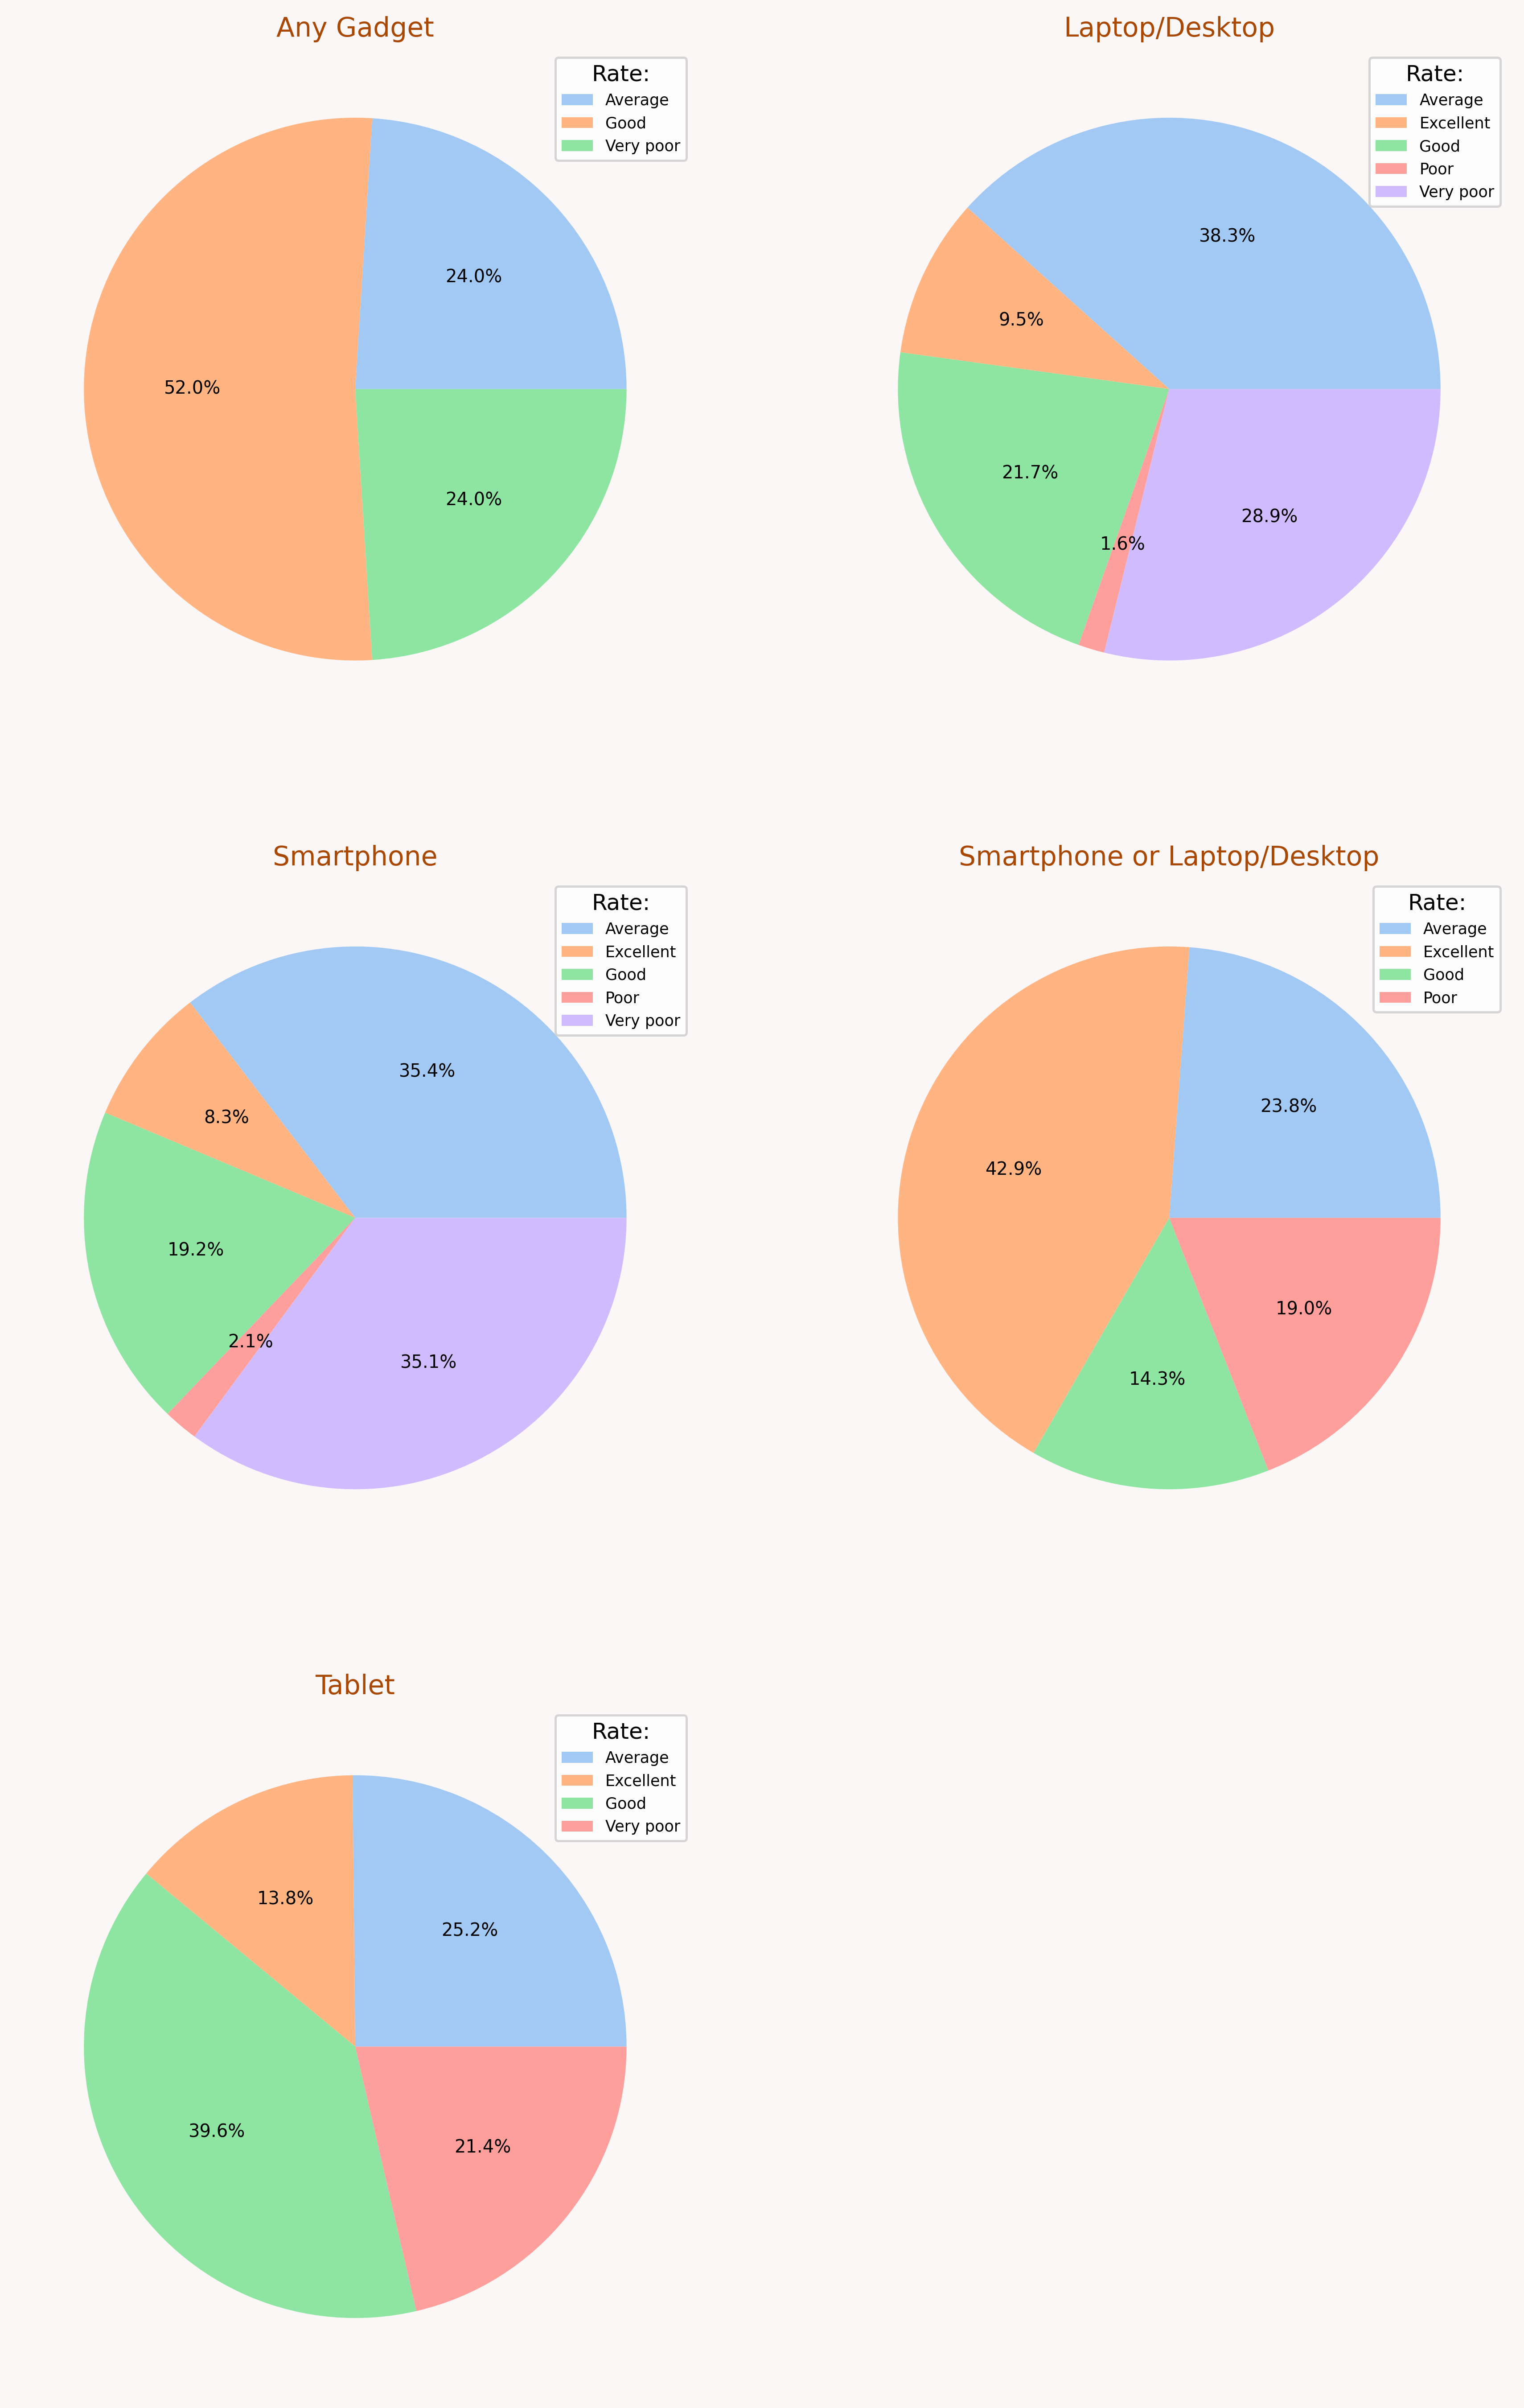

In [244]:
rating = ['Excellent', 'Good', 'Average', 'Poor', 'Very poor']
medium = ['Any Gadget', 'Laptop/Desktop', 'Smartphone', 'Smartphone or Laptop/Desktop', 'Tablet']
plt.rcParams['figure.dpi'] = 360
palette_color = sns.color_palette('pastel')
c1=0
c2=0
fig, axes = plt.subplots(3,2, figsize=(12, 19),facecolor='#fcf7f7')
for i,c in enumerate(medium):
    d=copy_4.loc[c].reset_index()
    data = d['Time spent on Online Class']
    keys = d['Rating of Online Class experience']
    if c2==2:
        c1+=1
        c2=0
    axes[c1][c2].pie(data , colors=palette_color, autopct='%.1f%%', textprops={'fontsize': 8})
    axes[c1][c2].legend(title = "Rate:",labels=keys,loc='upper right',fontsize=7)
    axes[c1][c2].set_title(c, size=12, color = '#a84803')
    c2+=1
axes[2,1].set_axis_off()
plt.show()

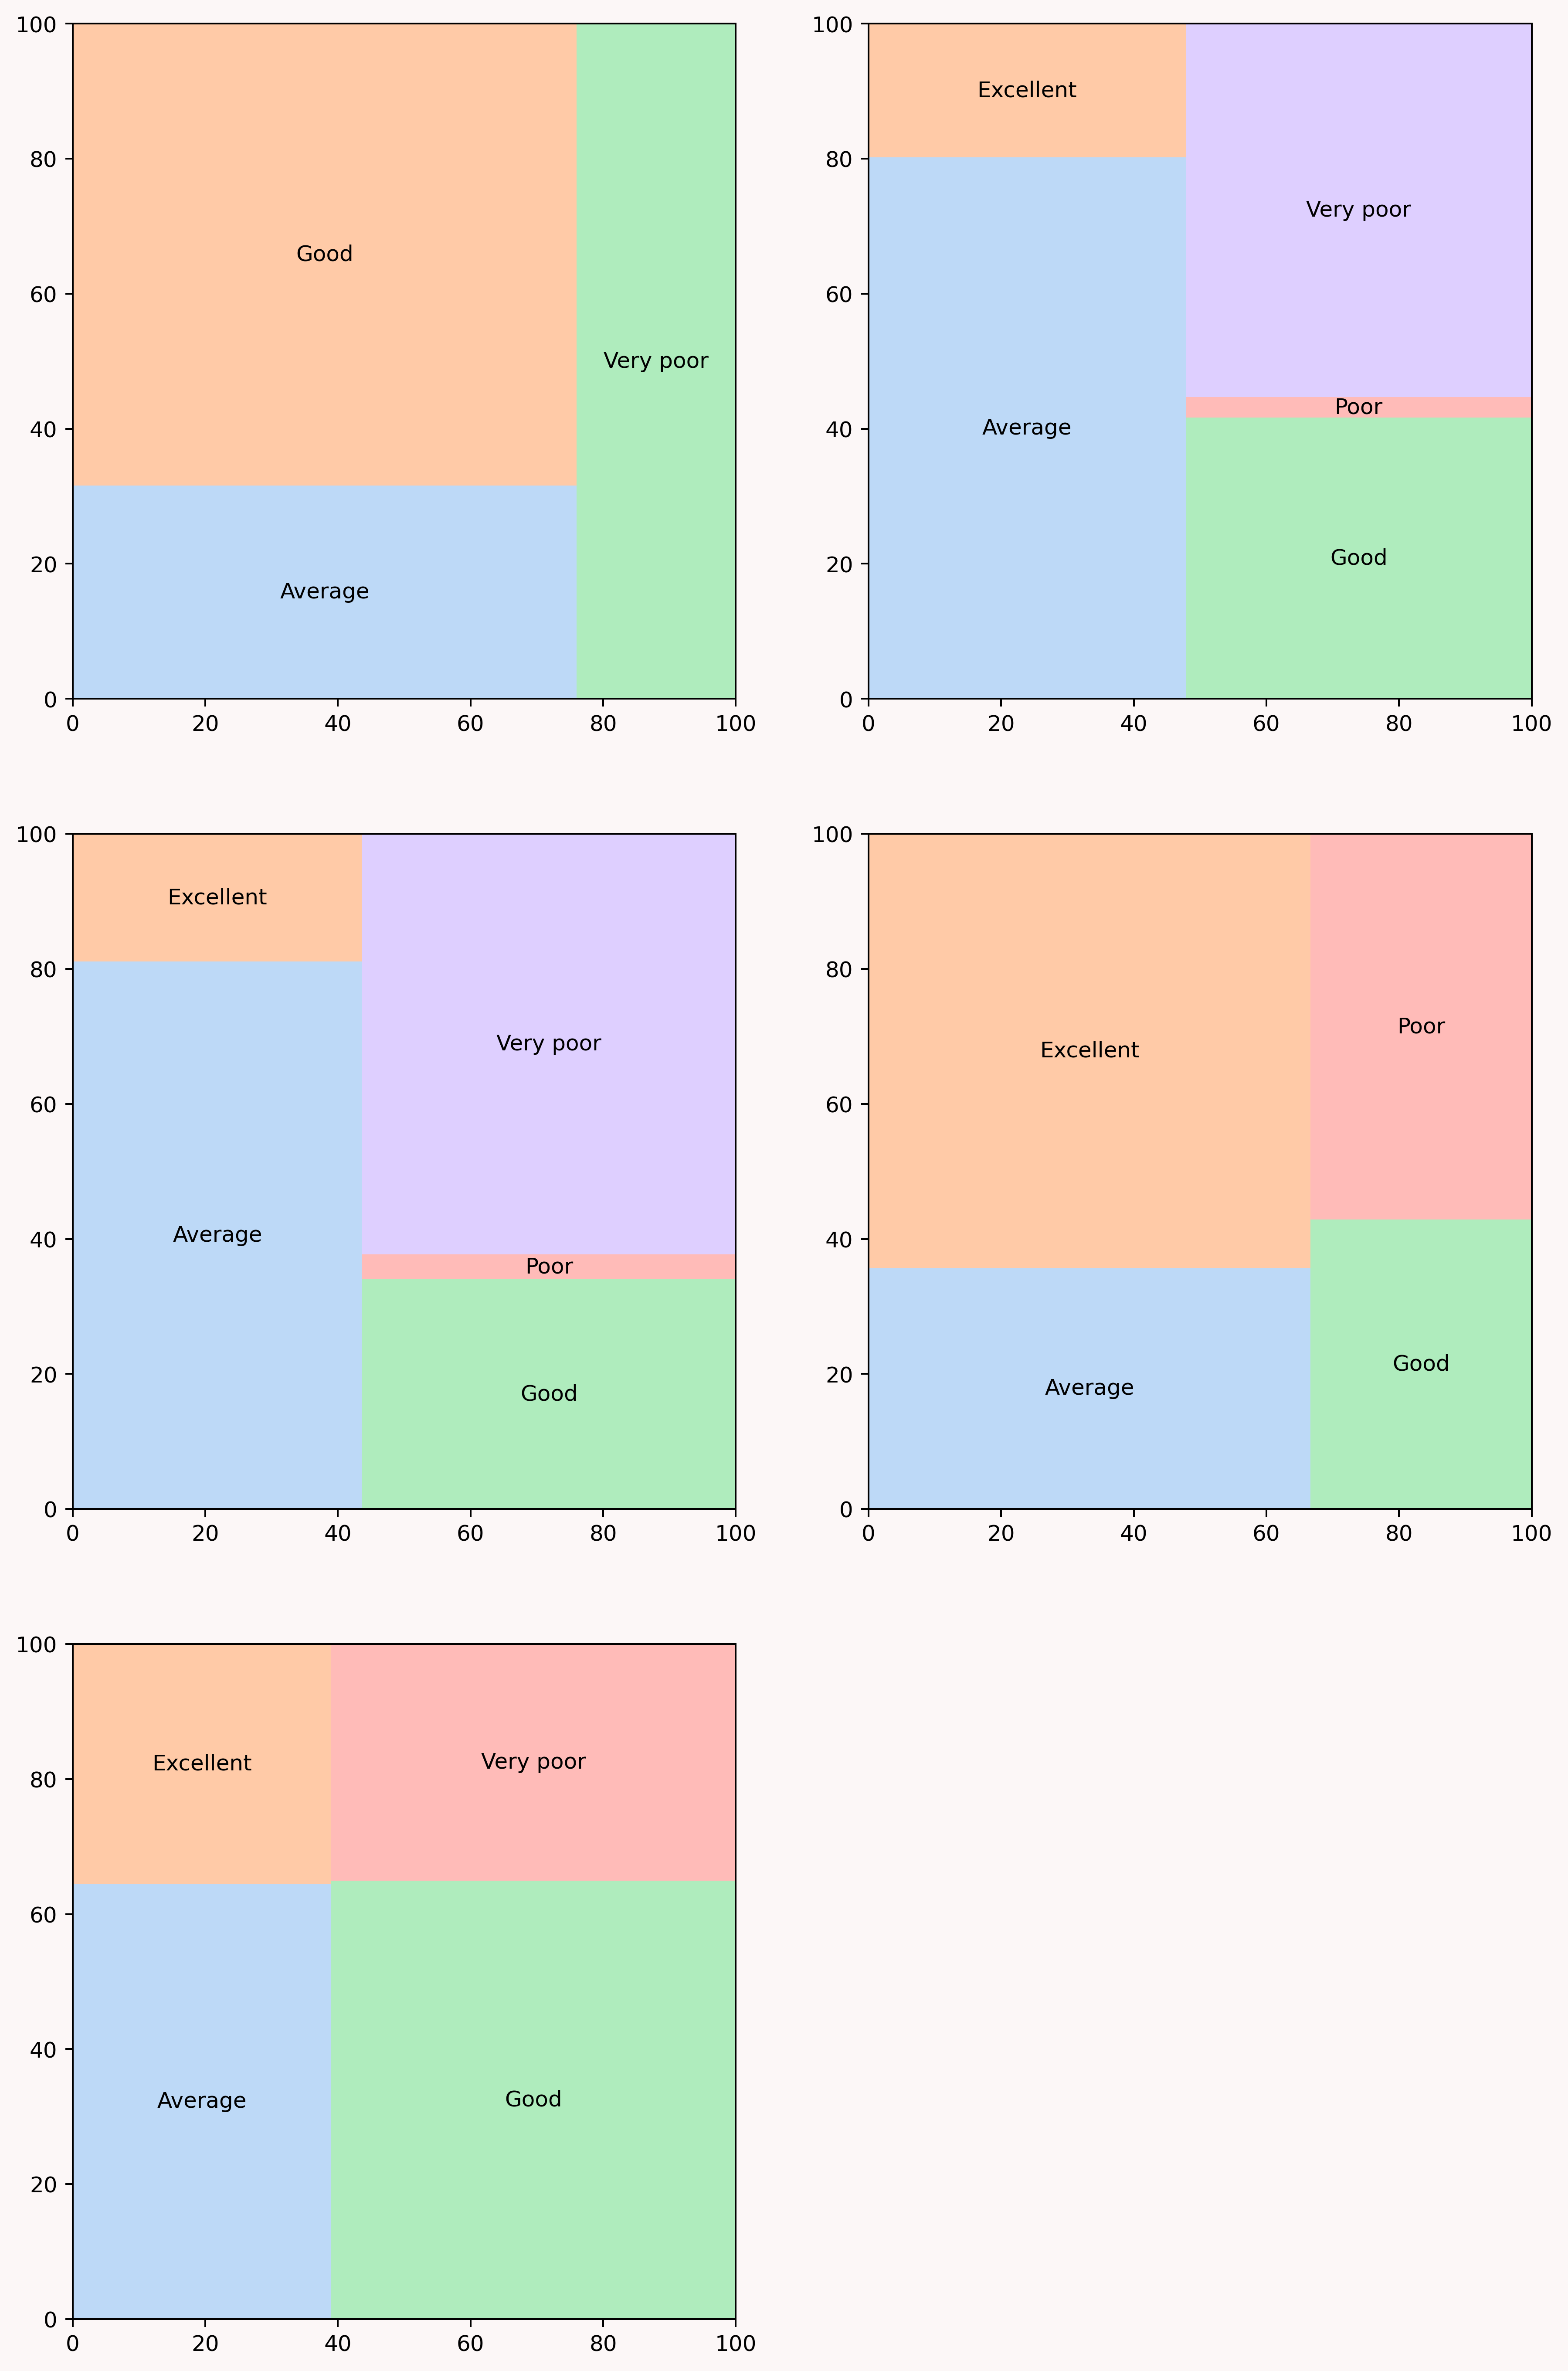

In [268]:
plt.rcParams['figure.dpi'] = 360
palette_color = sns.color_palette('pastel')
c1=0
c2=0
fig, axes = plt.subplots(3,2, figsize=(12, 19),facecolor='#fcf7f7')
for i,c in enumerate(medium):
    d=copy_4.loc[c].reset_index()
    data = d['Time spent on Online Class']
    keys = d['Rating of Online Class experience']
    if c2==2:
        c1+=1
        c2=0
    squarify.plot(sizes=data, label=keys, ax=axes[c1][c2],
              color=palette_color, alpha=0.7)

    c2+=1
axes[2,1].set_axis_off()
plt.show()